<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Oct 14 15:13:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   56C    P2             29W /  200W |    2574MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
!pip install tqdm

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.4.1
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

Healthcare and medical imaging  
Autonomous vehicles  
Retail and e-commerce: visual search  

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is produced when the model learns too much on the training dataset making unable to generalize and perform appropriatelly on unseen test data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Adding regularization: This methods tries to eliminate those factors that do not impact the prediction outcomes by grading feature based on importance. It penalizes the complexity of the model to prevent overfitting.
* Early stopping: It pauses the training process before the machine leaning model learns the noise in the data.
* Pruning: This methods aims to identify the most important features in the dataset and removes the least ones. Pruning can also involve reducing parts of the model that have minimal impact, for examples, some neurons in an NN.next
* Data augmentation: This method consists of changing slightly the sample data every time it is used for training the model. In images, for every epoch, the training iamge can vary in brighness, contrast, angle, etc.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
    )

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
image, label = train_dataset[1]
image.shape

torch.Size([1, 28, 28])

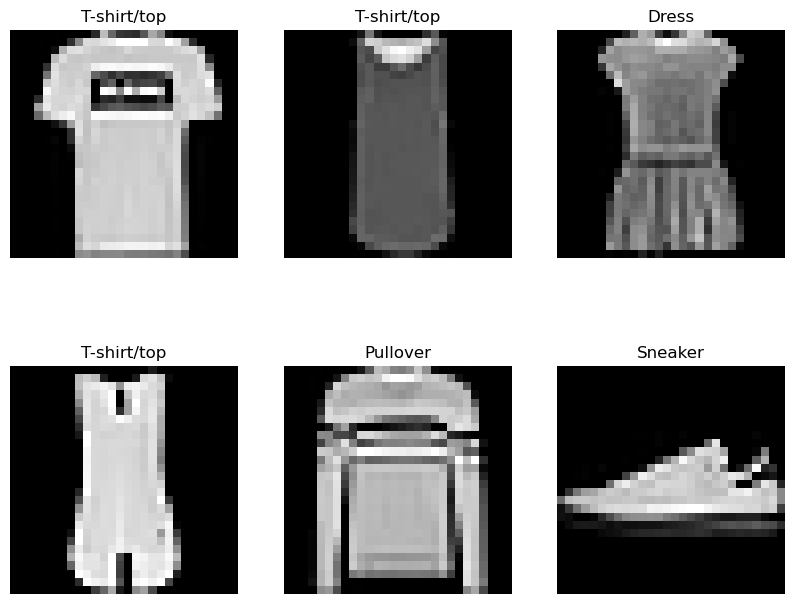

In [5]:
import random

torch.manual_seed(42)
#train_samples = []
#train_labels = []
#for img, label in random.sample(list(train_dataset), k=5):
#    train_samples.append(img)
#    train_labels.append(label)

#plt.figure(figsize=(9,9))
#rows=2
#cols=3
#class_names = train_dataset.classes
#for i, img in enumerate(train_samples):
#    plt.subplot(rows, cols, i+1)
#    plt.imshow(img.squeeze(), cmap="gray")
#    plt.title(class_names[train_labels[i]])
#    plt.axis(False);

fig = plt.figure(figsize=(10,8))
rows = 2
cols = 3
class_names = train_dataset.classes
for i in range(1, rows*cols + 1):
    idx = torch.randint(0, len(train_dataset), size=[1]).item()
    sample, label = train_dataset[i]
    fig.add_subplot(rows, cols, i)
    plt.imshow(sample.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Create a convolutional neural network 
from torch import nn
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape) #torch.Size([1, 10, 14, 14])
        x = self.block_2(x)
        #print(x.shape) #torch.Size([1, 10, 7, 7])
        x = self.classifier(x)
        #print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
# Download helper functions
import requests
from pathlib import Path 
from tqdm import tqdm  # Standard usage for scripts

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    # request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

#if Path("pytorch_functions.py").is_file():
#    print("pytorch_functions.py already exists, skipping download")
#else:
print("Downloading pytorch_functions.py")
request = requests.get("https://raw.githubusercontent.com/sergio-sanz-rodriguez/custom_python_functions/refs/heads/main/pytorch_functions.py")
with open("pytorch_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
from pytorch_functions import train_nn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

# Train the model with 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_nn(model=model_2,
         train_data_loader=train_dataloader,
         test_data_loader=test_dataloader,
         loss_fn=loss_fn,
         optimizer=optimizer,
         accuracy_fn=accuracy_fn,
         device=device,
         epochs=5) 

helper_functions.py already exists, skipping download


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.61216 | Train accuracy: 77.78%


 20%|██        | 1/5 [00:12<00:51, 12.82s/it]

Test loss: 0.39502 | Test accuracy: 86.12%

Epoch: 1
---------
Train loss: 0.36309 | Train accuracy: 87.01%


 40%|████      | 2/5 [00:26<00:39, 13.15s/it]

Test loss: 0.34430 | Test accuracy: 87.68%

Epoch: 2
---------
Train loss: 0.32020 | Train accuracy: 88.46%


 60%|██████    | 3/5 [00:39<00:26, 13.37s/it]

Test loss: 0.31258 | Test accuracy: 88.88%

Epoch: 3
---------
Train loss: 0.29728 | Train accuracy: 89.25%


 80%|████████  | 4/5 [00:53<00:13, 13.39s/it]

Test loss: 0.31954 | Test accuracy: 88.47%

Epoch: 4
---------
Train loss: 0.28422 | Train accuracy: 89.73%


100%|██████████| 5/5 [01:06<00:00, 13.37s/it]

Test loss: 0.28487 | Test accuracy: 89.72%



## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [9]:
# Create a subset of test dataloader with 9 samples.
import random
from torch.utils.data import Subset

N_SAMPLES=9
indexes = random.sample(range(len(test_dataset)), k=N_SAMPLES)
test_subset = Subset(test_dataset, indexes)
test_subset_loader = DataLoader(test_subset, batch_size=N_SAMPLES, shuffle=False)

In [10]:
def make_predictions(model: torch.nn.Module,
                     dataloader: torch.utils.data.DataLoader,
                     device: torch.device = device):
    y_preds = []
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Making predictions"):

            # Send data and targets to target device
            X, y = X.to(device), y.to(device)
            
            # Do the forward pass
            y_logit = model_2(X)

            # Turn predictions from logits -> prediction probabilities -> predictions labels
            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
            
            # Put predictions on CPU for evaluation
            y_preds.append(y_pred.cpu())

    # Concatenate list of predictions into a tensor
    return torch.cat(y_preds)

In [11]:
y_preds = make_predictions(model=model_2,
                           dataloader=test_subset_loader,
                           device=device)

y_labels = []

for _, labels in test_subset_loader:
    y_labels.extend(labels.tolist())

Making predictions: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [13]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

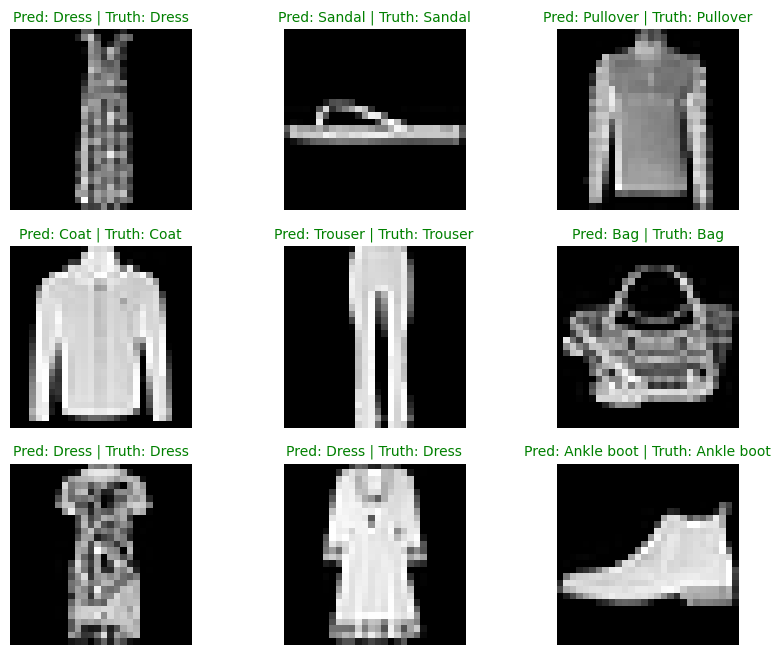

In [14]:
fig = plt.figure(figsize=(10,8))
rows = 3
cols = 3
for i in range(0, rows*cols):
    sample, label = test_subset_loader.dataset[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    title_text = f"Pred: {class_names[y_preds[i]]} | Truth: {class_names[y_labels[i]]}"
    # Check for equality and change title colour accordingly
    if y_preds[i] == y_labels[i]:
         plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [16]:
# See if torchmetrics exists, if not, install it
import sys
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    # Use subprocess to run pip install in Python
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", "torchmetrics", "-U", "mlxtend"])
    
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

mlxtend version: 0.23.1
0.23.1


Making predictions: 100%|██████████| 313/313 [00:01<00:00, 199.63it/s]


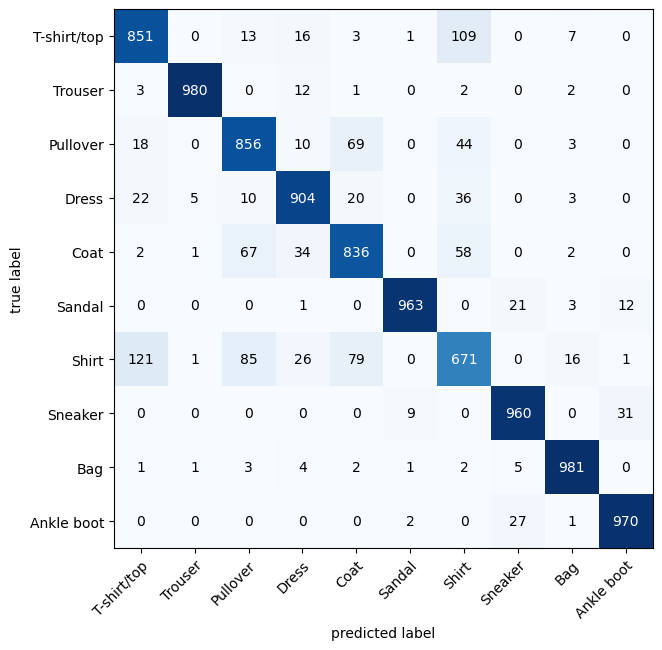

In [38]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions
y_preds_all = make_predictions(model=model_2,
                               dataloader=test_dataloader,
                               device=device)

y_labels_all = []

for _, labels in test_dataloader:
    y_labels_all.extend(labels.tolist())

y_labels_all = torch.tensor(y_labels_all)

(y_labels_all == test_dataset.targets).all()

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_all,
                         target=y_labels_all)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

C:\Users\ssre_\AppData\Local\Temp\ipykernel_15780\472805102.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_labels_all = torch.tensor(y_labels_all)


tensor([9, 2, 1,  ..., 8, 1, 5])

In [25]:
test_dataset.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?